In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
mob = pd.read_csv('mobile.csv')
mob.head(4)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2


In [3]:
mob.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
mob.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
bluetooth = mob.blue.value_counts()
bluetooth

0    1010
1     990
Name: blue, dtype: int64

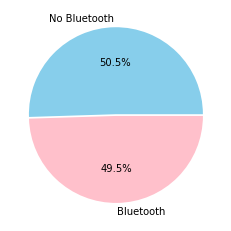

In [6]:
plt.pie(bluetooth.values, labels=['No Bluetooth','Bluetooth'], colors = ['Skyblue','Pink'], 
       autopct="%1.1f%%", explode=[0.01,0.01])
plt.show()

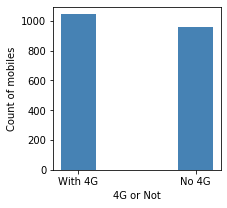

In [7]:
fig = plt.figure(figsize=(3,3))
fourG = mob.four_g.value_counts()
fourG
plt.bar(['With 4G','No 4G'], fourG.values, color = 'Steelblue',width=0.3)
plt.xlabel('4G or Not')
plt.ylabel('Count of mobiles')
plt.show()

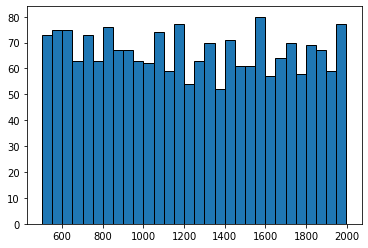

In [8]:
plt.hist(mob.battery_power,bins = 30,edgecolor = 'Black')
plt.show()

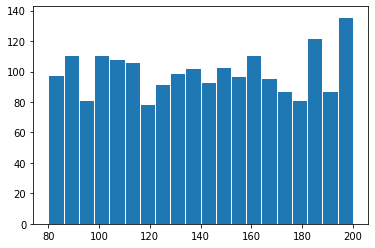

In [9]:
plt.hist(mob.mobile_wt,edgecolor= 'White', bins = 20)
plt.show()

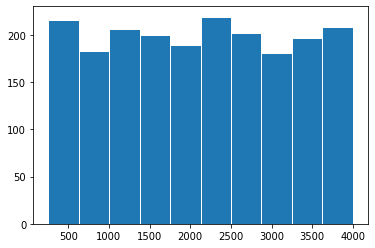

In [10]:
plt.hist(mob['ram'], edgecolor = 'White')
plt.show()

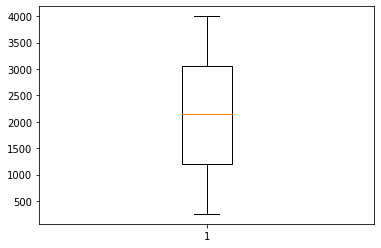

In [11]:
plt.boxplot(mob['ram'])
plt.show()

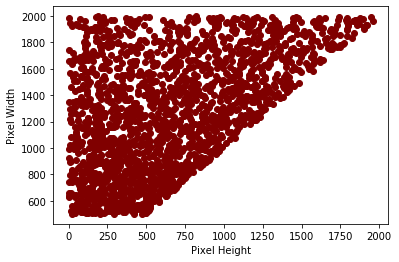

In [12]:
plt.scatter(mob.px_height, mob.px_width, color = "Maroon")
plt.xlabel("Pixel Height")
plt.ylabel('Pixel Width')
plt.show()

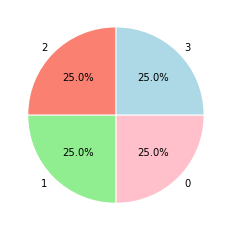

In [13]:
price = mob.price_range.value_counts()
colors = ['Lightblue','salmon','lightgreen','pink']
plt.pie(price.values, labels=price.index, autopct='%0.1f%%',colors = colors, 
        explode=[0.01,0.01,0.01,0.01])
plt.show()

In [14]:
#Find the average battery power and also average Ram for all 4 types of price ranges.
mob.groupby('price_range')['battery_power'].mean()

price_range
0    1116.902
1    1228.868
2    1228.320
3    1379.984
Name: battery_power, dtype: float64

In [15]:
mob.groupby('price_range')['ram'].mean()

price_range
0     785.314
1    1679.490
2    2582.816
3    3449.232
Name: ram, dtype: float64

In [16]:
#Splitting into input and output
X = mob.iloc[:,:-1]
y = mob.iloc[:, -1]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_tr, x_te, y_tr, y_te = train_test_split(X,y,test_size=0.25)

In [19]:
#To store all accuracies from all models
accuracies = []

In [20]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_tr, y_tr)

LogisticRegression()

In [21]:
y_pr = model.predict(x_te)
from sklearn.metrics import accuracy_score
accuracies.append(accuracy_score(y_te, y_pr)*100)

In [22]:
#Hyper Parameter tunning using grid search CV
max_feat = [0.2,0.5,1.0]
max_dep = [2,3,4,5,6,7,8,9]
param_grid = {'max_features':max_feat, 'max_depth':max_dep}

model = DecisionTreeClassifier()
cls = GridSearchCV(estimator=model, param_grid=param_grid, cv = 5, n_jobs=-1, verbose=2)

cls.fit(x_tr, y_tr)

cls.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'max_depth': 7, 'max_features': 1.0}

In [23]:
from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier(max_depth=7, max_features=1.0)
cls.fit(x_tr,y_tr)
y_pred = cls.predict(x_te)
accuracies.append(accuracy_score(y_te, y_pred)*100)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=9, metric='euclidean')

In [26]:
model.fit(x_tr, y_tr)
y_pred = model.predict(x_te)
accuracies.append(accuracy_score(y_te, y_pred)*100)

In [27]:
model=SVC()
model.fit(x_tr, y_tr)
y_pred = model.predict(x_te)
accuracies.append(accuracy_score(y_te, y_pred)*100)

In [29]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_tr, y_tr)
y_pred = model.predict(x_te)
accuracies.append(accuracy_score(y_te, y_pred)*100)

In [30]:
max_feat = [0.2,0.5,1.0]
max_dep = [2,3,4,5,6,7,8,9]
param_grid = {'max_features':max_feat, 'max_depth':max_dep}

model = RandomForestClassifier()
cls = GridSearchCV(estimator=model, param_grid=param_grid, cv = 5, n_jobs=-1, verbose=2)

cls.fit(x_tr, y_tr)

cls.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'max_depth': 8, 'max_features': 0.5}

In [32]:
#Using Hyper parameter tunned Random Forest
model = RandomForestClassifier(max_depth=8, max_features=0.5)
model.fit(x_tr, y_tr)
y_pred = model.predict(x_te)
accuracy = accuracy_score(y_te, y_pred)*100
print("The accuracy of tunned Random Firest is:", accuracy)
accuracies.append(accuracy)

The accuracy of tunned Random Firest is: 87.8


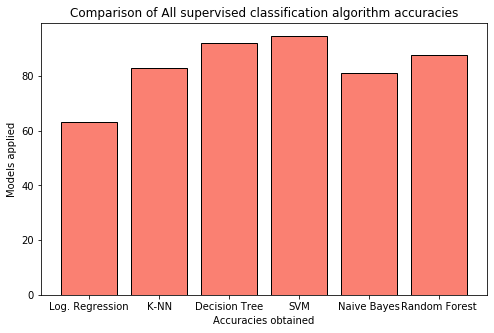

In [34]:
#Creating comparison of accuracies
fig = plt.figure(figsize=(8,5))
models = ['Log. Regression','K-NN','Decision Tree','SVM', 'Naive Bayes', 'Random Forest',]
plt.bar(models, accuracies, color = 'Salmon', edgecolor = 'Black')
plt.ylabel("Models applied")
plt.xlabel('Accuracies obtained')
plt.title('Comparison of All supervised classification algorithm accuracies')
plt.show()